In [126]:
import os
import sqlite3
import pandas as pd
import numpy as np

In [127]:
import sys
sys.path.append('../')
from NeuralNetwork.tools import save_to_db, groupby, make_valid_df
from NeuralNetwork.neural_network import NeuralNetwork

In [128]:
list(os.walk('..'))

[('..',
  ['__pycache__',
   'Test',
   'NeuralNetwork',
   'architecture_models',
   '.ipynb_checkpoints',
   'saved_models',
   'By_dates',
   'Data',
   '.git'],
  ['Links.txt', 'New.txt', 'Интересно.txt', '.gitignore']),
 ('../__pycache__', [], ['neural_network.cpython-38.pyc']),
 ('../Test',
  ['.ipynb_checkpoints'],
  ['Test_4.ipynb',
   'Test_5&NeuralNetwork_7.ipynb',
   'Test_groupby.ipynb',
   'Test_6&NeuralNetwork_7.ipynb',
   'Test_1.ipynb',
   'Test_3.ipynb',
   'Test_2.ipynb']),
 ('../Test/.ipynb_checkpoints', [], ['Test_groupby-checkpoint.ipynb']),
 ('../NeuralNetwork',
  ['__pycache__', '.ipynb_checkpoints'],
  ['NeuralNetwork_1.ipynb',
   'NeuralNetwork_11_first_layer_tests.ipynb',
   'NeuralNetwork_8_and_group_by.ipynb',
   'NeuralNetwork_3.ipynb',
   'NeuralNetwork_2.ipynb',
   'NeuralNetwork_6.ipynb',
   'tools.py',
   '__init__.py',
   'neural_network.py',
   'NeuralNetwork_10_and_metrics.ipynb',
   'NeuralNetwork_7.ipynb',
   'NeuralNetwork_4.ipynb',
   'NeuralNetw

In [129]:
databases = [dir_path for dir_path in os.walk('..') if 'other.db' in dir_path[2]][0]
databases

('../Data/databases',
 [],
 ['model_metrics.db',
  'Aleksashina_Керов_Андрей.db',
  'clear_emotions.db',
  'other.db'])

In [130]:
df = pd.DataFrame()

In [131]:
data_dir = databases[0]
for db_file in databases[2]:
    if db_file in ['clear_emotions.db', 'model_metrics.db']:
        continue
    db_path = os.path.join(data_dir, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)

In [132]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.9878594,0.003336495,0.008397053,0.001824096,0.007600656,6.9452e-05,0.000141165,-0.005060558,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.9878824,0.003385304,0.008362157,0.001782566,0.007644675,8.0761e-05,0.000138702,-0.004976853,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.9879055,0.003434114,0.008327262,0.001741036,0.007688694,9.207e-05,0.00013624,-0.004893148,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.9879286,0.003482923,0.008292366,0.001699506,0.007732714,0.000103379,0.000133777,-0.004809443,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.9880258,0.003506238,0.008183754,0.00164466,0.00778434,0.000113112,0.000130297,-0.004677515,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.9315634,3.7894e-05,0.02397099,0.06796286,0.02635098,0.000250268,0.000691861,-0.06792496,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.9356429,3.1707e-05,0.0237766,0.06259692,0.02374056,0.000229404,0.000798602,-0.06256521,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.9384109,2.6894e-05,0.023437,0.05935737,0.02117987,0.000212627,0.000848645,-0.05933048,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.9407817,2.3125e-05,0.02303489,0.05651735,0.01901644,0.000197417,0.000877875,-0.05649422,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [133]:
pa_fields =     [
    'Valence',
    'Arousal'
]
seven_fields = [
    'Neutral', 
    'Happy', 
    'Sad', 
    'Angry', 
    'Surprised', 
    'Scared', 
    'Disgusted'
]

In [134]:
fields = seven_fields + pa_fields
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [135]:
make_valid_df(df, fields)

In [136]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [137]:
df_train, df_other = groupby(df, other=True)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:01:40.700_Балакин Владислав_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:00.100_Zaharova_10,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:01:37.900_Балакин Владислав_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:01:36.300_Смолин Александр_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,0.00,0.25
00:00:09.696_Боим_1,0.99,0.00,0.01,0.01,0.01,0.0,0.0,-0.01,0.25
...,...,...,...,...,...,...,...,...,...
00:00:17.500_Смолин Александр_1,0.02,0.96,0.00,0.00,0.00,0.0,0.0,0.96,0.90
00:00:20.900_Aleksashina_1,0.01,0.98,0.00,0.00,0.00,0.0,0.0,0.97,0.67
00:00:16.900_Смолин Александр_1,0.02,0.97,0.00,0.00,0.00,0.0,0.0,0.97,0.87


In [138]:
df_other

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.030_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.060_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.090_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.121_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.151_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
...,...,...,...,...,...,...,...,...,...
00:00:11.696_Fomin_6,0.05,0.93,0.0,0.0,0.00,0.0,0.0,0.93,0.78
00:00:04.060_Керов Андрей_2,0.04,0.94,0.0,0.0,0.00,0.0,0.0,0.94,0.53
00:00:11.909_Fomin_6,0.03,0.95,0.0,0.0,0.00,0.0,0.0,0.95,0.83


In [139]:
databases_dir = [dir_ for dir_ in list(os.walk('..')) if 'databases' in dir_[0]][0]
databases_dir

('../Data/databases',
 [],
 ['model_metrics.db',
  'Aleksashina_Керов_Андрей.db',
  'clear_emotions.db',
  'other.db'])

In [140]:
name_db = 'clear_emotions'
db_path = os.path.join(databases_dir[0], f'{name_db}.db')
db_path

'../Data/databases/clear_emotions.db'

In [141]:
connection = sqlite3.connect(db_path)
df_clear = pd.read_sql(f'select * from {name_db}', con=connection)
df_clear

,Index_,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
0,00:00:01.300_Смолин Александр_1,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
1,00:00:07.575_Керов Андрей_8,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
2,00:00:03.000_Боим_9,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
3,00:00:05.700_Provotorov_3,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
4,00:00:09.848_Korsakov_9,0.97,0.0,0.0,0.01,0.01,0.0,0.01,-0.01,0.3
...,...,...,...,...,...,...,...,...,...,...
525,00:00:07.700_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
526,00:00:08.200_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
527,00:00:07.300_Nasyrov_7,0.01,0.0,0.0,0.0,0.0,0.0,0.99,-0.99,0.62
528,00:00:08.900_Nasyrov_7,0.0,0.0,0.0,0.01,0.0,0.0,1.0,-1.0,0.63


In [142]:
make_valid_df(df_clear, fields)

In [143]:
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [144]:
df_clear = df_clear[fields]

In [145]:
df_clear

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:01.300_Смолин Александр_1,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:07.575_Керов Андрей_8,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:03.000_Боим_9,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:05.700_Provotorov_3,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:09.848_Korsakov_9,0.97,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.30
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [146]:
full_df_list = [df_train, df_clear]
percent_df_list = [df_other]

In [147]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields])

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [148]:
df_train, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:46.100_Смолин Александр_1,0.90,0.00,0.01,0.00,0.11,0.01,0.00,-0.01,0.42
00:01:24.700_Бушунов Виктор_1,0.80,0.01,0.03,0.17,0.02,0.00,0.00,-0.18,0.35
00:01:27.600_Турчина Екатерина_1,0.23,0.81,0.00,0.00,0.00,0.00,0.00,0.81,0.46
00:00:44.100_Бушунов Виктор_1,0.63,0.00,0.09,0.32,0.01,0.00,0.03,-0.34,0.36
00:00:04.424_Korsakov_8,0.71,0.00,0.03,0.08,0.02,0.02,0.00,-0.12,0.53
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.00,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.00,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.00,0.99,-0.99,0.62


In [149]:
df_test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:01:31.400_Бондаренко Денис_2,0.77,0.15,0.01,0.00,0.01,0.00,0.00,0.14,0.40
00:00:00.393_Керов Андрей_3,0.99,0.00,0.00,0.00,0.01,0.00,0.00,-0.00,0.25
00:00:00.606_Fomin_2,0.95,0.01,0.02,0.04,0.01,0.00,0.01,-0.05,0.25
00:00:01.848_Korsakov_4,0.98,0.00,0.01,0.01,0.01,0.00,0.00,-0.01,0.28
00:00:00.878_Korsakov_7,0.99,0.00,0.00,0.01,0.01,0.00,0.00,-0.01,0.33
...,...,...,...,...,...,...,...,...,...
00:00:30.600_Левандовский Кирилл_1,0.76,0.00,0.09,0.07,0.01,0.06,0.00,-0.17,0.33
00:00:37.500_Бондаренко Денис_2,0.88,0.01,0.02,0.04,0.02,0.00,0.02,-0.04,0.48
00:00:10.575_Fomin_3,0.99,0.00,0.01,0.01,0.01,0.00,0.00,-0.01,0.26


In [150]:
from keras.models import Model
from keras.layers import Input, Dense

In [151]:
models = []

In [152]:
a = Input(shape=(2,))
b = Dense(7)(a)
model = Model(inputs=a, outputs=b)
model.compile(optimizer='adam', loss='mse')

In [153]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [154]:
nn.fit(df_train, epochs=10, batch_size=20)

Epoch 1/10
916/916 [==============================] - 4s 3ms/step - loss: 0.0502
Epoch 2/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0254
Epoch 3/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0204
Epoch 4/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0172
Epoch 5/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0154
Epoch 6/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0146
Epoch 7/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0142
Epoch 8/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 9/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 10/10
916/916 [==============================] - 3s 4ms/step - loss: 0.0141


In [155]:
models.append(('0', 0, nn))

In [156]:
metrics = ['mean', 'norm', 'stat']

In [157]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [158]:
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + metrics)
df_metrics

,model,layer,N,mean,norm,stat


In [159]:
entry_dict = {'model': models[0][0], 'layer': 'first', 'N': 0}
entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
df_metrics = df_metrics.append(entry_dict, ignore_index = True)

In [160]:
# df_metrics.insert(2, 'N', ['0'] * len(df_metrics))

In [161]:
df_metrics

,model,layer,N,mean,norm,stat
0,0,first,0,0.097691,0.252532,0.355648


### Следующие модели

In [162]:
list(range(2, 10))

[2, 3, 4, 5, 6, 7, 8, 9]

In [163]:
len(models)

1

In [164]:
d = {'1': '2', '3': '4'}
print(d)

{'1': '2', '3': '4'}


In [165]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [166]:
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:46.100_Смолин Александр_1,0.90,0.00,0.01,0.00,0.11,0.01,0.00,-0.01,0.42
00:01:24.700_Бушунов Виктор_1,0.80,0.01,0.03,0.17,0.02,0.00,0.00,-0.18,0.35
00:01:27.600_Турчина Екатерина_1,0.23,0.81,0.00,0.00,0.00,0.00,0.00,0.81,0.46
00:00:44.100_Бушунов Виктор_1,0.63,0.00,0.09,0.32,0.01,0.00,0.03,-0.34,0.36
00:00:04.424_Korsakov_8,0.71,0.00,0.03,0.08,0.02,0.02,0.00,-0.12,0.53
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.00,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.00,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.00,0.99,-0.99,0.62


In [167]:
for i in range(2, 10):
    a = Input(shape=(2,))
    first = Dense(i, activation='relu')(a)
    b = Dense(7, activation='sigmoid')(first)
    model = Model(inputs=a, outputs=b)
    model.compile(optimizer='adam', loss='mse')
    nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)
    models.append((str(i), i, nn))
    print('fit', models[-1][0])
    nn.fit(df_train, epochs=20, batch_size=20)
    entry_dict = {'model': models[-1][0], 'layer': 'first', 'N': i}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/NeuralNetwork/../NeuralNetwork/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


fit 2
Epoch 1/20
916/916 [==============================] - 4s 3ms/step - loss: 0.1239
Epoch 2/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0316
Epoch 3/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0237
Epoch 4/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0181
Epoch 5/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0172
Epoch 6/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0169
Epoch 7/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0166
Epoch 8/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0163
Epoch 9/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0156
Epoch 10/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0145
Epoch 11/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0128
Epoch 12/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0108
Epoch 13/20
916/916

916/916 [==============================] - 3s 3ms/step - loss: 0.0062
Epoch 16/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0061
Epoch 17/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0061
Epoch 18/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0061
Epoch 19/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0061
Epoch 20/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0061
{'model': '6', 'layer': 'first', 'N': 6, 'mean': 0.05621901834022579, 'norm': 0.157741729912538, 'stat': 0.35121813}
fit 7
Epoch 1/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0940
Epoch 2/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0156
Epoch 3/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0092
Epoch 4/20
916/916 [==============================] - 3s 3ms/step - loss: 0.0080
Epoch 5/20
916/916 [==============================] - 3s 3ms/step - loss:

In [156]:
# for i in range(1, 9):
#     df_metrics.at[i, 'N'] = i + 1

In [168]:
df_metrics

,model,layer,N,mean,norm,stat
0,0,first,0,0.097691,0.252532,0.355648
1,2,first,2,0.066802,0.181509,0.333160
2,3,first,3,0.063376,0.173690,0.348556
3,4,first,4,0.066689,0.180710,0.343963
4,5,first,5,0.060116,0.166108,0.350678
5,6,first,6,0.056219,0.157742,0.351218
6,7,first,7,0.061075,0.166462,0.343471
7,8,first,8,0.055652,0.155662,0.350097
8,9,first,9,0.054356,0.152193,0.347560


In [169]:
df_metrics['N']

0    0
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: N, dtype: object

In [170]:
df_metrics['N'] = df_metrics['N'].apply(lambda x: int(x))

In [171]:
import matplotlib.pyplot as plt

In [172]:
x = []
y = []
for metric in metrics:
    x.append(df_metrics['N'])
    y.append(df_metrics[metric])

In [173]:
y[0]

0    0.097691
1    0.066802
2    0.063376
3    0.066689
4    0.060116
5    0.056219
6    0.061075
7    0.055652
8    0.054356
Name: mean, dtype: float64

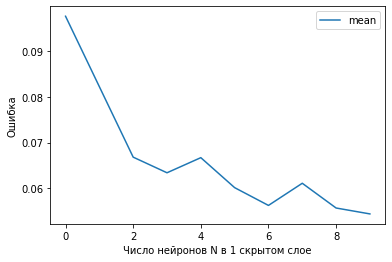

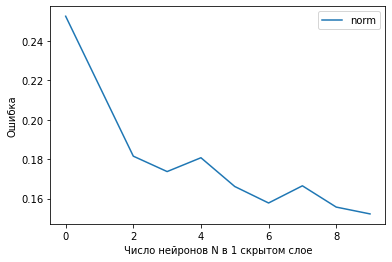

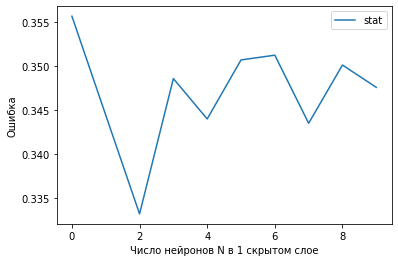

In [175]:
for i in range(len(metrics)):
    plt.plot(x[i], y[i], label=metrics[i])
    plt.xlabel("Число нейронов N в 1 скрытом слое")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

In [176]:
models

[('0', 0, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbd585954f0>),
 ('2', 2, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc71d868e0>),
 ('3', 3, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc71e76100>),
 ('4', 4, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc71dd23d0>),
 ('5', 5, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc99c55dc0>),
 ('6', 6, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc72210f10>),
 ('7', 7, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc99b112b0>),
 ('8', 8, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc99bcc3a0>),
 ('9', 9, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc99ebd040>)]

In [194]:
dir_path = '../saved_models/first/'
save_name = 'model_first_9'
path = os.path.join(dir_path, save_name)
path

'../saved_models/first/model_first_9'

In [181]:
models[-1][2].model.save(path)

INFO:tensorflow:Assets written to: ../saved_models/model_first_9/assets


### Дообучение

In [182]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [183]:
len(models)

9

In [185]:
v = 2
for nn_tuple in models:
    nn = nn_tuple[2]
    print('refit', nn_tuple[0])
    df_train = nn.create_train_df_from_diff(test)
    nn.fit(df_train, epochs=20, batch_size=20)
    entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

refit 0
Epoch 1/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0230
Epoch 2/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0225
Epoch 3/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0223A: 1s
Epoch 4/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0221
Epoch 5/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0220
Epoch 6/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0220
Epoch 7/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0219
Epoch 8/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0219
Epoch 9/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0219
Epoch 10/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0219
Epoch 11/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0219
Epoch 12/20
296/296 [==============================] - 1s 3ms/step - loss: 0.0219
Epoch 13/20


237/237 [==============================] - 1s 3ms/step - loss: 0.0153
Epoch 16/20
237/237 [==============================] - 1s 3ms/step - loss: 0.0153
Epoch 17/20
237/237 [==============================] - 1s 2ms/step - loss: 0.0153
Epoch 18/20
237/237 [==============================] - 1s 3ms/step - loss: 0.0152
Epoch 19/20
237/237 [==============================] - 1s 3ms/step - loss: 0.0152
Epoch 20/20
237/237 [==============================] - 1s 3ms/step - loss: 0.0152
{'model': '5_2', 'layer': 'first', 'N': 5, 'mean': 0.07726667931967819, 'norm': 0.2136613612740839, 'stat': 0.3380959}
refit 6
Epoch 1/20
237/237 [==============================] - 1s 3ms/step - loss: 0.0160
Epoch 2/20
237/237 [==============================] - 1s 2ms/step - loss: 0.0157
Epoch 3/20
237/237 [==============================] - 1s 3ms/step - loss: 0.0156
Epoch 4/20
237/237 [==============================] - 1s 3ms/step - loss: 0.0155
Epoch 5/20
237/237 [==============================] - 1s 3ms/step - l

In [186]:
n = len(df_metrics)

In [187]:
df_metrics

,model,layer,N,mean,norm,stat
0,0,first,0,0.097691,0.252532,0.355648
1,2,first,2,0.066802,0.181509,0.333160
2,3,first,3,0.063376,0.173690,0.348556
3,4,first,4,0.066689,0.180710,0.343963
4,5,first,5,0.060116,0.166108,0.350678
5,6,first,6,0.056219,0.157742,0.351218
6,7,first,7,0.061075,0.166462,0.343471
7,8,first,8,0.055652,0.155662,0.350097
8,9,first,9,0.054356,0.152193,0.347560
9,0_2,first,0,0.128925,0.333870,0.339059


In [221]:
# df_metrics.iloc[-(n // v):]

In [189]:
metrics

['mean', 'norm', 'stat']

In [190]:
x = []
y = []
for metric in metrics:
    x.append(df_metrics[-(n // v):]['N'])
    y.append(df_metrics[-(n // v):][metric])

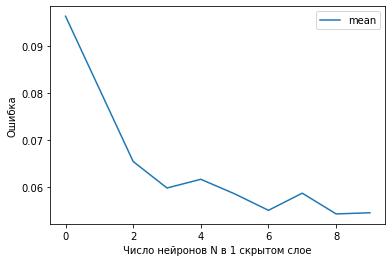

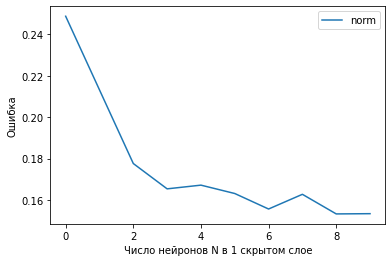

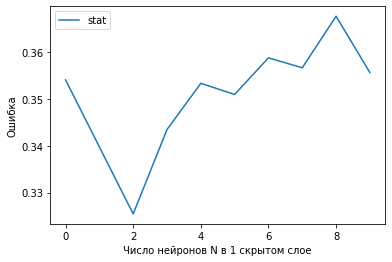

In [218]:
for i in range(len(metrics)):
    plt.plot(x[i], y[i], label=metrics[i])
    plt.xlabel("Число нейронов N в 1 скрытом слое")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

In [195]:
dir_path = '../saved_models/first/'
save_name = 'model_first_6_2'
path = os.path.join(dir_path, save_name)
path

'../saved_models/first/model_first_6_2'

In [197]:
models[5]

('6', 6, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc72210f10>)

In [199]:
models[5][2].model.save(path)

INFO:tensorflow:Assets written to: ../saved_models/first/model_first_6_2/assets


In [200]:
full_df_list

[                                  Neutral  Happy   Sad  Angry  Surprised  \
 Index_                                                                     
 00:01:40.700_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
 00:00:00.100_Zaharova_10             0.99   0.00  0.00   0.00       0.01   
 00:01:37.900_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
 00:01:36.300_Смолин Александр_1      0.99   0.00  0.00   0.00       0.01   
 00:00:09.696_Боим_1                  0.99   0.00  0.01   0.01       0.01   
 ...                                   ...    ...   ...    ...        ...   
 00:00:17.500_Смолин Александр_1      0.02   0.96  0.00   0.00       0.00   
 00:00:20.900_Aleksashina_1           0.01   0.98  0.00   0.00       0.00   
 00:00:16.900_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
 00:00:17.000_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
 00:00:15.000_Aleksashina_1           0.01   0.99  0.00   0.00       0.00   

In [201]:
percent_df_list

[                             Neutral  Happy  Sad  Angry  Surprised  Scared  \
 Index_                                                                       
 00:00:00.030_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.060_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.090_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.121_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.151_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 ...                              ...    ...  ...    ...        ...     ...   
 00:00:11.696_Fomin_6            0.05   0.93  0.0    0.0       0.00     0.0   
 00:00:04.060_Керов Андрей_2     0.04   0.94  0.0    0.0       0.00     0.0   
 00:00:11.909_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
 00:00:11.969_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
 00:00:13.100_Aleksashina_1      0.02   0.97  0.0   

In [202]:
df_train, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:06.272_Korsakov_9,0.98,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.32
00:01:46.900_Турчина Екатерина_1,0.98,0.00,0.02,0.01,0.02,0.0,0.00,-0.02,0.21
00:01:13.000_Куликов Алексей_1,0.53,0.01,0.22,0.01,0.02,0.0,0.00,-0.21,0.55
00:01:26.900_Бондаренко Денис_2,0.19,0.70,0.00,0.00,0.00,0.0,0.00,0.70,0.49
00:00:02.000_Боим_3,0.75,0.00,0.08,0.07,0.01,0.0,0.06,-0.13,0.18
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [203]:
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [205]:
v = 3
for nn_tuple in models:
    nn = nn_tuple[2]
    print('refit', nn_tuple[0])
    nn.fit(df_train, epochs=10, batch_size=20)
    entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

refit 0
Epoch 1/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0142
Epoch 2/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 3/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 4/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 5/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 6/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 7/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 8/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 9/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 10/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
{'model': '0_3', 'layer': 'first', 'N': 0, 'mean': 0.09639325921242672, 'norm': 0.24882436340872563, 'stat': 0.35409793}
refit 2
Epoch 1/10
916/916 [==============================] 

916/916 [==============================] - 2s 2ms/step - loss: 0.0057
Epoch 10/10
916/916 [==============================] - 2s 2ms/step - loss: 0.0057
{'model': '9_3', 'layer': 'first', 'N': 9, 'mean': 0.05460172633387307, 'norm': 0.1533300999319852, 'stat': 0.35564408}


In [206]:
n = len(df_metrics)

In [207]:
df_metrics[-(n // v):]

,model,layer,N,mean,norm,stat
18,0_3,first,0,0.096393,0.248824,0.354098
19,2_3,first,2,0.065503,0.177585,0.325443
20,3_3,first,3,0.059869,0.165338,0.343472
21,4_3,first,4,0.061721,0.167130,0.353361
22,5_3,first,5,0.058628,0.163083,0.350972
23,6_3,first,6,0.055124,0.155587,0.358797
24,7_3,first,7,0.058770,0.162693,0.356677
25,8_3,first,8,0.054359,0.153213,0.367691
26,9_3,first,9,0.054602,0.153330,0.355644


In [208]:
x = []
y = []
for metric in metrics:
    x.append(df_metrics[-(n // v):]['N'])
    y.append(df_metrics[-(n // v):][metric])

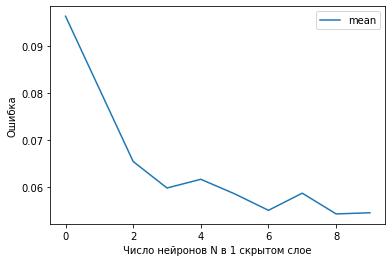

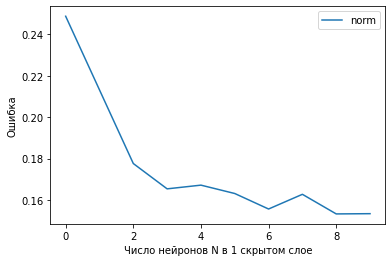

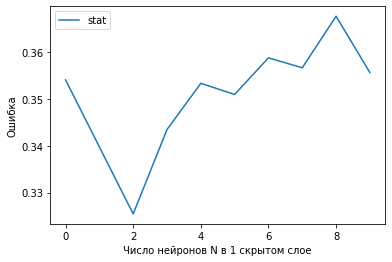

In [209]:
for i in range(len(metrics)):
    plt.plot(x[i], y[i], label=metrics[i])
    plt.xlabel("Число нейронов N в 1 скрытом слое")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

In [210]:
import os

In [212]:
df_metrics[-(n // v):].loc[26:]

,model,layer,N,mean,norm,stat
26,9_3,first,9,0.054602,0.15333,0.355644


In [213]:
dir_path = '../saved_models/first/'
save_name = 'model_first_9_3'
path = os.path.join(dir_path, save_name)
path

'../saved_models/first/model_first_9_3'

In [214]:
models

[('0', 0, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbd585954f0>),
 ('2', 2, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc71d868e0>),
 ('3', 3, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc71e76100>),
 ('4', 4, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc71dd23d0>),
 ('5', 5, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc99c55dc0>),
 ('6', 6, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc72210f10>),
 ('7', 7, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc99b112b0>),
 ('8', 8, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc99bcc3a0>),
 ('9', 9, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc99ebd040>)]

In [215]:
models[-1]

('9', 9, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc99ebd040>)

In [216]:
models[-1][2].model.save(path)

INFO:tensorflow:Assets written to: ../saved_models/first/model_first_9_3/assets


In [222]:
v = 4
for nn_tuple in models:
    nn = nn_tuple[2]
    print('refit', nn_tuple[0])
    df_train = nn.create_train_df_from_diff(test)
    nn.fit(df_train, epochs=10, batch_size=20)
    entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

refit 0
Epoch 1/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0217
Epoch 2/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0217
Epoch 3/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0217
Epoch 4/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0216
Epoch 5/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0216
Epoch 6/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0217
Epoch 7/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0217
Epoch 8/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0216
Epoch 9/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0216
Epoch 10/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0216
{'model': '0_4', 'layer': 'first', 'N': 0, 'mean': 0.1220054257794208, 'norm': 0.3147487545817099, 'stat': 0.34006542}
refit 2
Epoch 1/10
270/270 [==============================] - 

277/277 [==============================] - 1s 3ms/step - loss: 0.0123
Epoch 10/10
277/277 [==============================] - 1s 2ms/step - loss: 0.0123
{'model': '9_4', 'layer': 'first', 'N': 9, 'mean': 0.057130881446512495, 'norm': 0.16047109471672227, 'stat': 0.35218462}


In [223]:
n = len(df_metrics)

In [229]:
df_metrics[-(n // (v+1)):] # Случайно обучил дважды

,model,layer,N,mean,norm,stat
36,0_4,first,0,0.122005,0.314749,0.340065
37,2_4,first,2,0.074245,0.197716,0.318367
38,3_4,first,3,0.066076,0.183862,0.335611
39,4_4,first,4,0.067738,0.184507,0.341676
40,5_4,first,5,0.067006,0.184240,0.345066
41,6_4,first,6,0.060189,0.171205,0.352513
42,7_4,first,7,0.065399,0.179800,0.348276
43,8_4,first,8,0.057785,0.163359,0.361056
44,9_4,first,9,0.057131,0.160471,0.352185


In [230]:
x = []
y = []
for metric in metrics:
    x.append(df_metrics[-(n // (v+1)):]['N'])
    y.append(df_metrics[-(n // (v+1)):][metric])

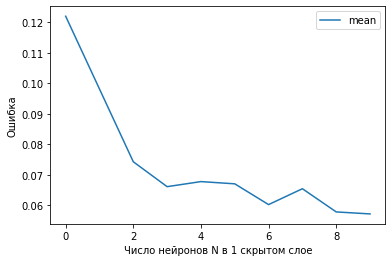

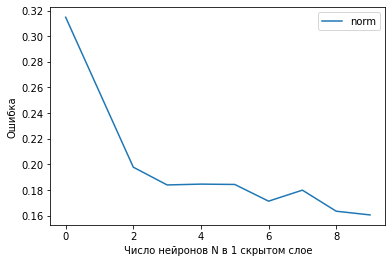

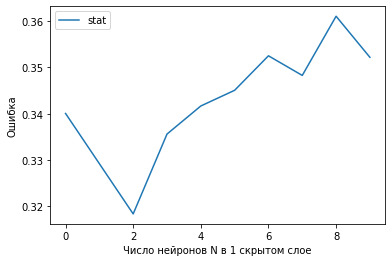

In [231]:
for i in range(len(metrics)):
    plt.plot(x[i], y[i], label=metrics[i])
    plt.xlabel("Число нейронов N в 1 скрытом слое")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

In [232]:
df_train, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:06.272_Korsakov_9,0.98,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.32
00:01:46.900_Турчина Екатерина_1,0.98,0.00,0.02,0.01,0.02,0.0,0.00,-0.02,0.21
00:01:13.000_Куликов Алексей_1,0.53,0.01,0.22,0.01,0.02,0.0,0.00,-0.21,0.55
00:01:26.900_Бондаренко Денис_2,0.19,0.70,0.00,0.00,0.00,0.0,0.00,0.70,0.49
00:00:02.000_Боим_3,0.75,0.00,0.08,0.07,0.01,0.0,0.06,-0.13,0.18
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [389]:
v = 5
for nn_tuple in models:
    nn = nn_tuple[2]
    print('refit', nn_tuple[0])
    nn.fit(df_train, epochs=5, batch_size=20)
    entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

refit 0
Epoch 1/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0145
Epoch 2/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0142
Epoch 3/5
916/916 [==============================] - 1s 2ms/step - loss: 0.0141
Epoch 4/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 5/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
{'model': '0_5', 'layer': 'first', 'N': 0, 'mean': 0.09712630229637173, 'norm': 0.2506625007648664, 'stat': 0.3543298}
refit 2
Epoch 1/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0145
Epoch 2/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0142
Epoch 3/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 4/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 5/5
916/916 [==============================] - 2s 2ms/step - loss: 0.0141
{'model': '2_5', 'layer': 'first', 'N': 2, 'mean': 0.097165067938

In [390]:
n = len(df_metrics)

In [402]:
metrics

['mean', 'norm', 'stat']

In [396]:
x = [[] for _ in range(len(metrics))]
y = [[] for _ in range(len(metrics))]

In [399]:
for i, metric in enumerate(metrics):
    x[i].append(df_metrics[4 * (n // v):]['N'])
    y[i].append(df_metrics[4 * (n // v):][metric])

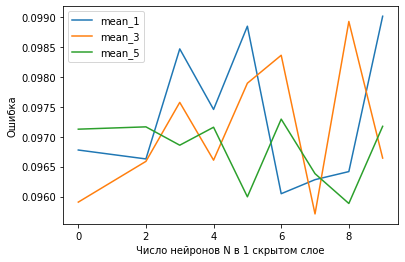

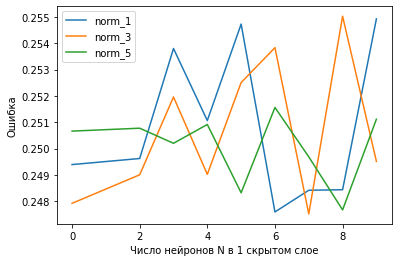

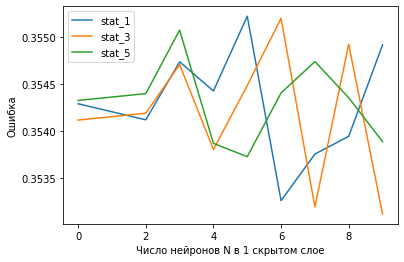

In [401]:
for i in range(len(metrics)):
    for j in range(len(x[i])):
        plt.plot(x[i][j], y[i][j], label=metrics[i] + f'_{j * 2 + 1}')
    plt.xlabel("Число нейронов N в 1 скрытом слое")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

### Сохраним результаты метрик 

In [405]:
res_metrics_df = df_metrics[df_metrics.model == '7_3']
res_metrics_df

,model,layer,N,mean,norm,stat
24,7_3,first,7,0.09571,0.247515,0.353197


In [413]:
name_db = 'model_metrics'
db_path = f'../Data/databases/{name_db}.db'

In [414]:
db_path

'../Data/databases/model_metrics.db'

In [415]:
save_to_db(db_path, name_db, res_metrics_df)

In [416]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,layer,N,mean,norm,stat
0,7_3,first,7,0.0957098467287175,0.247515327140797,0.353197246789932


### Разработка функции apply_float() для NN.tools модуля

In [71]:
def apply_float(df_, columns):
    for field in columns:
        df_[field] = df_[field].apply(lambda el: float(el))

### Использование функции apply_float()

In [72]:
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [77]:
apply_float(df, fields)

In [78]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.940782,0.000023,0.023035,0.056517,0.019016,0.000197,0.000878,-0.056494,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [79]:
df['Neutral']

0        0.987859
1        0.987882
2        0.987905
3        0.987929
4        0.988026
           ...   
20842    0.931563
20843    0.935643
20844    0.938411
20845    0.940782
20846    0.942106
Name: Neutral, Length: 25321, dtype: float64

In [80]:
df['Action_Unit_12___Right___Lip_Corner_Puller']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
20842    0.0
20843    0.0
20844    0.0
20845    0.0
20846    0.0
Name: Action_Unit_12___Right___Lip_Corner_Puller, Length: 25321, dtype: object

### Разработка функции make_valid_df() для NN.tools модуля

In [17]:
def make_valid_df(df_, columns=None):
    if columns is not None:
        apply_float(df_, columns)
    df_.index = df_['Index_']

In [82]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.940782,0.000023,0.023035,0.056517,0.019016,0.000197,0.000878,-0.056494,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [84]:
make_valid_df(df, fields)

In [85]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
